In [1]:
%cd /content/drive/MyDrive/Github/FL-project

/content/drive/MyDrive/Github/FL-project


In [2]:
from main import *
import argparse
from centralized import Centralized
from client import *

In [3]:
class Args():
  def __init__(self, dataset, model, bs, hnm, num_epochs):
    self.dataset = dataset
    self.model = model 
    self.bs = bs
    self.hnm = hnm
    self.num_epochs = num_epochs

args = Args('iddaCB', model = 'deeplabv3_mobilenetv2', bs = 16, hnm = False, num_epochs = 5)

In [4]:
trainAloneDataset, testAloneDatasets = get_datasets(args)
ds = trainAloneDataset[0]

In [5]:
#istanziamo il modello 
model = model_init(args)

In [6]:
centralized = Centralized(args,ds,model)
state_dict = torch.load('modelliSalvati/checkpoint.pth')
model.classifier.load_state_dict(state_dict)
centralized.train()

params freezed
epoca 0
epoch 1 / 5, step 10 / 37, loss = 0.317
epoch 1 / 5, step 20 / 37, loss = 0.362
epoch 1 / 5, step 30 / 37, loss = 0.351
epoch 1 / 5, step 37 / 37, loss = 0.357
epoca 1
epoch 2 / 5, step 10 / 37, loss = 0.356
epoch 2 / 5, step 20 / 37, loss = 0.355
epoch 2 / 5, step 30 / 37, loss = 0.335
epoch 2 / 5, step 37 / 37, loss = 0.408
epoca 2
epoch 3 / 5, step 10 / 37, loss = 0.381
epoch 3 / 5, step 20 / 37, loss = 0.331
epoch 3 / 5, step 30 / 37, loss = 0.380
epoch 3 / 5, step 37 / 37, loss = 0.337
epoca 3
epoch 4 / 5, step 10 / 37, loss = 0.352
epoch 4 / 5, step 20 / 37, loss = 0.365
epoch 4 / 5, step 30 / 37, loss = 0.368
epoch 4 / 5, step 37 / 37, loss = 0.422
epoca 4
epoch 5 / 5, step 10 / 37, loss = 0.343
epoch 5 / 5, step 20 / 37, loss = 0.358
epoch 5 / 5, step 30 / 37, loss = 0.329
epoch 5 / 5, step 37 / 37, loss = 0.343
Finish training
Model saved


In [7]:
from utils.stream_metrics import StreamSegMetrics
metric = StreamSegMetrics(16, 'centralizzato')
centralized.test(metric)

In [8]:
metric.get_results()['Mean IoU']

0.3177893877999158

In [64]:
from torch.utils.data import DataLoader
train_loader = DataLoader(ds, batch_size = 2, shuffle = False, drop_last = True)

In [65]:
centralized.model.eval()
with torch.no_grad():
  for i, (images, labels) in enumerate(train_loader):
    images = images.cuda() 
    labels = labels.cuda()
    outputs = centralized.model(images)['out']
    break

In [66]:
outputs = centralized.model(images[0].view(1, 3, 512, 928))['out']

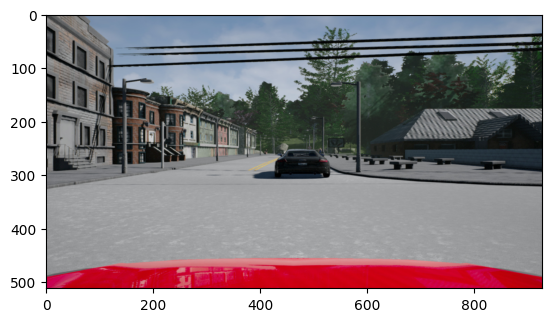

In [67]:
import matplotlib.pyplot as plt
def unNormalize(tensorImage, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]):
        for t, m, s in zip(tensorImage, mean, std):
            t.mul_(s).add_(m)
        return tensorImage
plt.imshow(unNormalize(images[0].cpu()).permute(1,2,0))

In [68]:
singoloOutputLogits = outputs[0]
prediction = singoloOutputLogits.argmax(0)

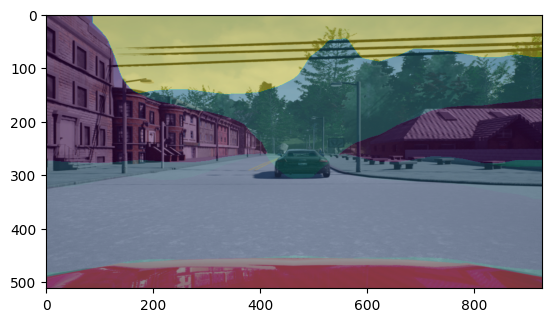

In [72]:
import matplotlib.pyplot as plt
plt.imshow(unNormalize(images[0].cpu()).permute(1,2,0))
plt.imshow(prediction.cpu().numpy(), alpha = 0.4)

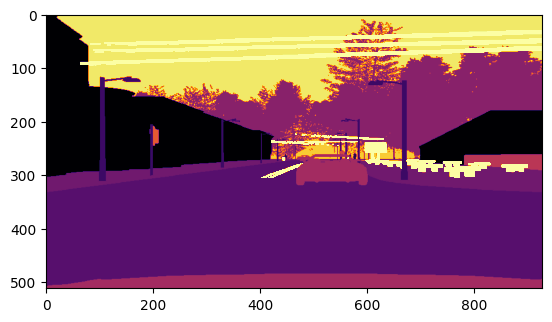

In [57]:
import matplotlib as mpl

plt.imshow(labels[0].cpu().numpy(), cmap = mpl.colormaps['inferno'], vmin = 0, vmax = 16)